# Predicción de las notas escolares de 10.000 estudiantes utlizando un modelo de regresión.

Un modelo de regresión es una técnica estadística utilizada para predecir un valor numérico continuo (variable dependiente) basándose en una o más variables predictoras (variables independientes). Su objetivo es encontrar la relación matemática entre las variables independientes y la variable dependiente, de manera que se pueda hacer predicciones o entender cómo cambian los valores de la variable dependiente en función de las independientes.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

* pandas (pd): Se utiliza para manipular datos tabulares, cargar archivos CSV, y realizar transformaciones básicas.
* numpy (np): Biblioteca para trabajar con matrices y operaciones numéricas.
* matplotlib.pyplot (plt) y seaborn (sns): Se utilizan para la visualización de datos. seaborn está basado en matplotlib pero proporciona gráficos más estéticos.
* scikit-learn es una biblioteca de Python utilizada para implementar una amplia gama de algoritmos de machine learning, incluyendo tareas de clasificación, regresión, agrupamiento (clustering) y reducción de dimensionalidad.




# **Etapa 1.** Carga y descubrimiento de los datos.

El <font color='darkred'>**Análisis Exploratorio de Datos (EDA)**</font> es el primer paso para entender las características y patrones de un conjunto de datos antes de aplicar modelos de machine learning. A través del EDA, podemos descubrir relaciones entre las variables, identificar valores atípicos, observar distribuciones, y revisar la presencia de datos faltantes o inconsistentes. En este análisis, estamos evaluando un dataset de 10,000 estudiantes, observando cómo diferentes variables, como las horas de estudio, el rendimiento en actividades extracurriculares y otros factores, impactan el Índice de Rendimiento (Performance Index).

Este informe incluye gráficos para comprender mejor la distribución de cada variable y la relación entre variables clave, como Horas Estudiadas y Índice de Rendimiento. A continuación, se presenta el análisis visual y una matriz de correlación para entender las interrelaciones entre las variables.

In [4]:
df = pd.read_csv("Student_Performance.csv")
display(df.head(3))
print('\n\r')
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
df.info()
display(df.shape)
print('\n\r')
display(df["Extracurricular Activities"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


(10000, 6)

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

No existen valores nulos por lo que facilita la limpieza de los datos

## Visualizar gráficamente los datos

Se generan histogramas con el fin de visualizar la distribución de las variables numéricas clave:
* Horas Estudiadas: Se observa cómo se distribuyen las horas que los estudiantes dedican al estudio.
* Puntuaciones Anteriores: Se evalúa el historial académico de los estudiantes a través de sus calificaciones previas.
* Horas de Sueño: Representa cuántas horas duermen los estudiantes, un factor importante para su rendimiento.
* Papeles de Preguntas Practicados: El número de exámenes de muestra que los estudiantes han practicado.
* Índice de Rendimiento: Esta variable numérica muestra el rendimiento general de los estudiantes.

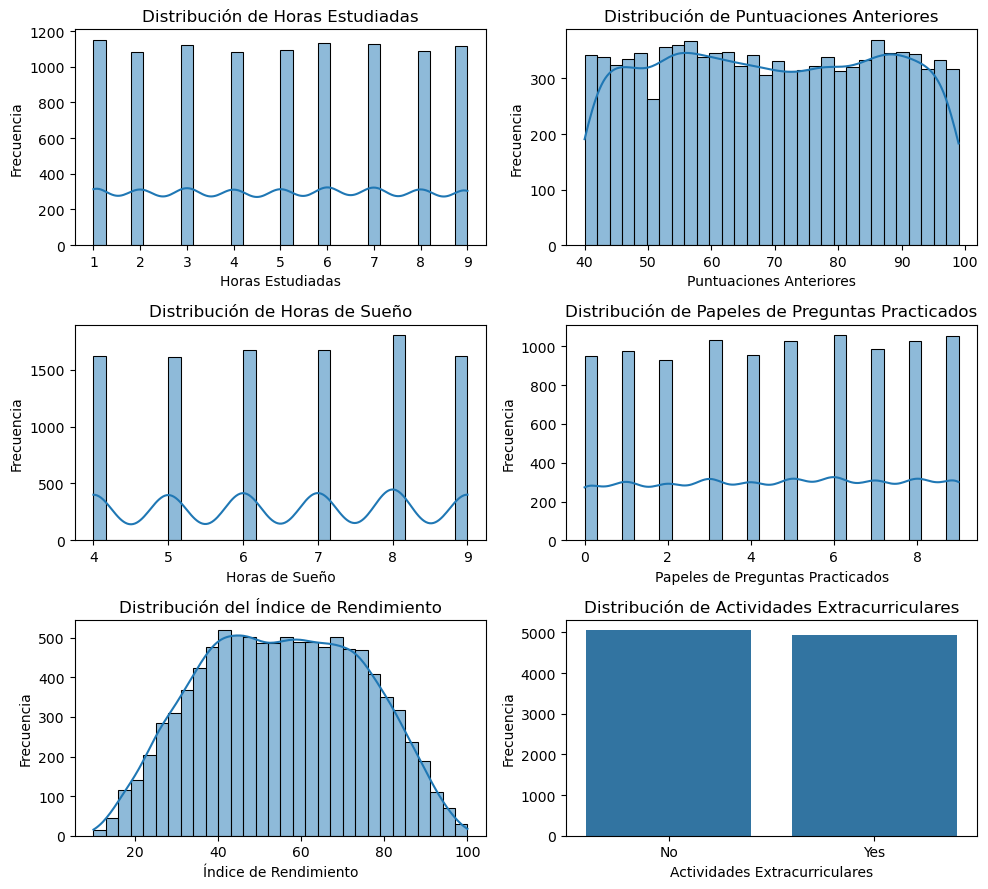

In [7]:
# Contar las actividades extracurriculares
activity_counts = df['Extracurricular Activities'].value_counts()
# Crear una figura con subgrillas
fig, axs = plt.subplots(3, 2, figsize=(10, 9))

# Histograma para Hours Studied
sns.histplot(df['Hours Studied'], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribución de Horas Estudiadas')
axs[0, 0].set_xlabel('Horas Estudiadas')
axs[0, 0].set_ylabel('Frecuencia')

# Histograma para Previous Scores
sns.histplot(df['Previous Scores'], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribución de Puntuaciones Anteriores')
axs[0, 1].set_xlabel('Puntuaciones Anteriores')
axs[0, 1].set_ylabel('Frecuencia')

# Histograma para Sleep Hours
sns.histplot(df['Sleep Hours'], bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribución de Horas de Sueño')
axs[1, 0].set_xlabel('Horas de Sueño')
axs[1, 0].set_ylabel('Frecuencia')

# Histograma para Sample Question Papers Practiced
sns.histplot(df['Sample Question Papers Practiced'], bins=30, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribución de Papeles de Preguntas Practicados')
axs[1, 1].set_xlabel('Papeles de Preguntas Practicados')
axs[1, 1].set_ylabel('Frecuencia')

# Histograma para Performance Index
sns.histplot(df['Performance Index'], bins=30, kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Distribución del Índice de Rendimiento')
axs[2, 0].set_xlabel('Índice de Rendimiento')
axs[2, 0].set_ylabel('Frecuencia')

sns.barplot(x=activity_counts.index, y=activity_counts.values)
axs[2, 1].set_title('Distribución de Actividades Extracurriculares')
axs[2, 1].set_xlabel('Actividades Extracurriculares')
axs[2, 1].set_ylabel('Frecuencia')

# Ajustar el layout
plt.tight_layout()
plt.show()

1. Se utiliza un gráfico de barras para visualizar la frecuencia de las diferentes actividades extracurriculares realizadas por los estudiantes. Esta variable categórica puede ser un indicador clave del desempeño estudiantil.
* Horas Estudiadas vs Índice de Rendimiento: Un gráfico de barras muestra cómo varía el rendimiento según las horas de estudio.
* Puntuaciones Anteriores vs Índice de Rendimiento: Se utiliza una gráfica de líneas para observar la relación entre las puntuaciones anteriores y el rendimiento actual de los estudiantes.
* Un gráfico de torta muestra el promedio del Índice de Rendimiento basado en si los estudiantes participaron en actividades extracurriculares o no. Esto permite evaluar si el compromiso con actividades fuera del aula tiene un impacto positivo o negativo en el rendimiento académico.

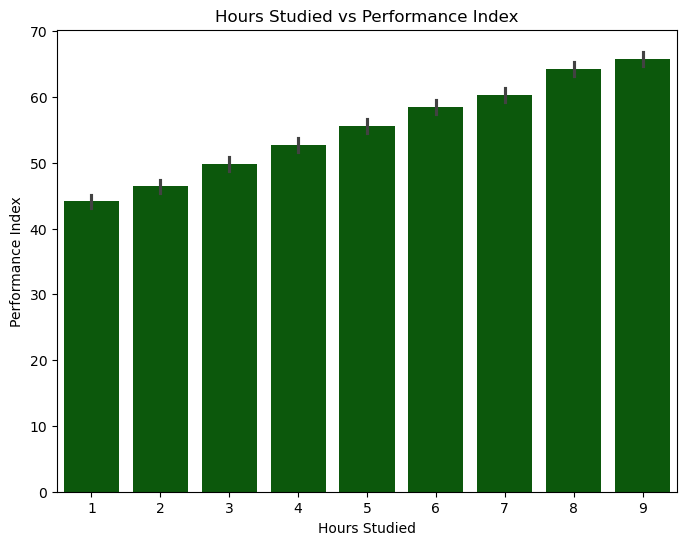

In [8]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Hours Studied', y='Performance Index', data=df, color='darkgreen')
plt.title('Hours Studied vs Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()

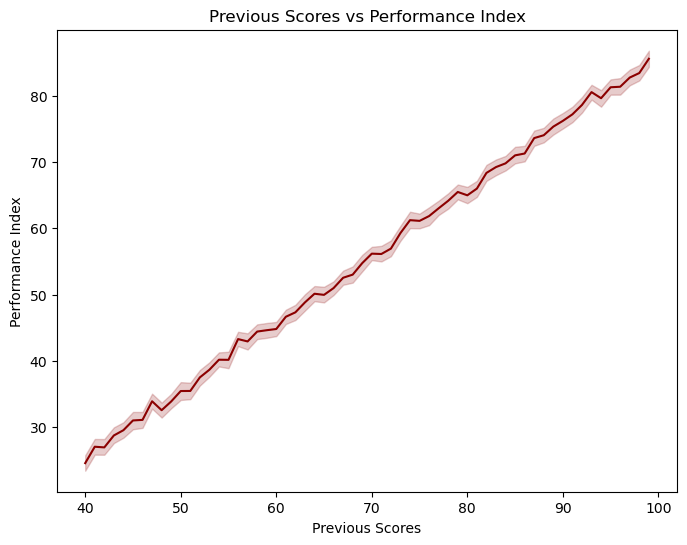

In [9]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Previous Scores', y='Performance Index', data=df, color='darkred')
plt.title('Previous Scores vs Performance Index')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.show()

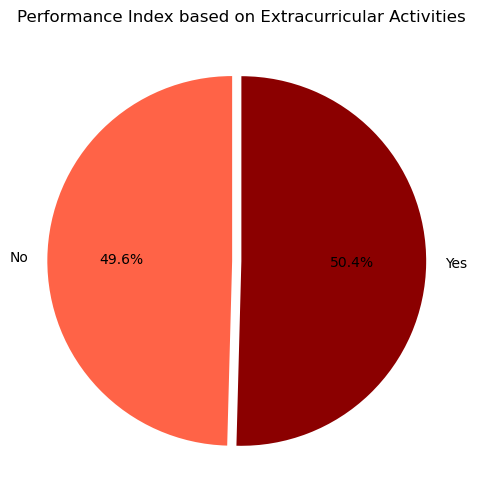

In [10]:
pie_data = df.groupby('Extracurricular Activities')['Performance Index'].mean()
plt.figure(figsize=(8, 6))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', colors=['tomato', 'darkred'], startangle=90, explode=(0.05, 0))  # explode ile dilimlerden birini ayırabilirsiniz
plt.title('Performance Index based on Extracurricular Activities')
plt.show()

La matriz de correlación nos permite ver qué tan relacionadas están las diferentes variables entre sí. Los valores de correlación van de -1 a 1, donde:

* 1 significa una correlación positiva perfecta.
* -1 indica una correlación negativa perfecta.
* 0 significa que no hay correlación.

Este análisis nos brinda una visión general de las relaciones entre las horas de estudio, puntuaciones anteriores, horas de sueño, preguntas practicadas y el índice de rendimiento.

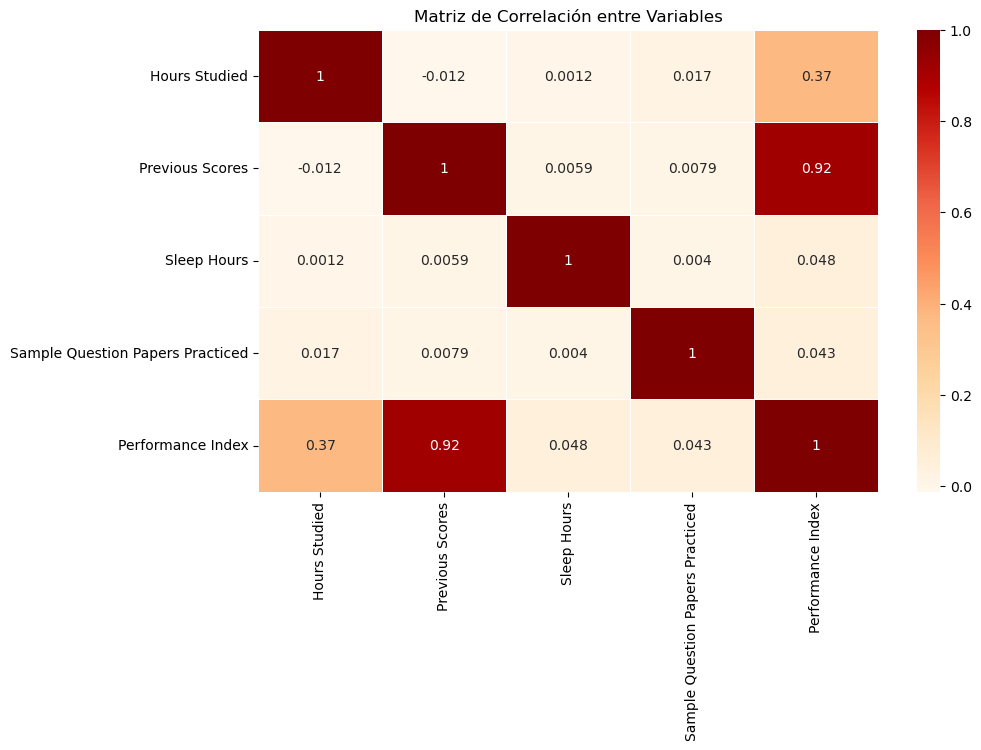

In [11]:
# Matriz de Correlación
df_corr = df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10, 6))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='OrRd', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

## Entrenar el modelo de Regresión Lineal

La regresión lineal es una técnica de modelado estadístico utilizada para predecir un valor numérico (variable dependiente) basándose en una o más variables independientes (predictoras). El objetivo principal es encontrar una relación lineal entre las variables, ajustando una línea recta que mejor describa los datos. Este modelo asume que existe una relación directa y proporcional entre las variables predictoras y el resultado.

En su forma más simple, la regresión lineal simple puede representarse mediante la ecuación:

𝑦
=
𝛽
0
+
𝛽
1
𝑥
+
𝜖
y=β
0
​
 +β
1
​
 x+ϵ

Donde:

* 𝑦
 es la variable dependiente (lo que queremos predecir).
* 𝑥
 es la variable independiente (predictora).
* 𝛽
0
β
0
​
  es el intercepto (el valor de
𝑦
 cuando
𝑥
=
0
).
* 𝛽
1
β
1
​
  es la pendiente de la línea de regresión, que indica el cambio en
𝑦
 por cada unidad de cambio en
𝑥
.
*𝜖
 es el término de error, que captura cualquier desviación del modelo lineal.

In [12]:
# Generar un preprocesador que organice las columnas para tener el mejor modelo posible
# Definir las columnas categóricas y numéricas
categorical_col = ['Extracurricular Activities']  # Nombre de la columna categórica
numerical_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']  # Nombres de las columnas numéricas

# Preprocesador que estandariza las columnas numéricas y codifica la categórica
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Escalar columnas numéricas
        ('cat', OneHotEncoder(), categorical_col)  # Codificar la columna categórica
    ]
)
X = df[numerical_cols + categorical_col]
y = df['Performance Index']
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Supongamos que la columna categórica es la columna 3 (índice 2)

1. Pipeline:
El Pipeline es una herramienta de scikit-learn que encadena varios pasos de procesamiento y modelado en un flujo secuencial. Esto permite realizar todas las transformaciones y ajustes en una única línea de código, facilitando la reproducción de resultados y la evaluación en conjuntos de datos diferentes.

2. Pasos del Pipeline:

  El primer paso del pipeline es el preprocesador, que transforma las columnas de los datos antes de ajustarlos al modelo. El objeto preprocessor es un ColumnTransformer que se encarga de:

  * Estandarizar las columnas numéricas (aplicar StandardScaler).
  * Codificar la columna categórica (aplicar OneHotEncoder). Esto garantiza que los datos de entrada estén en un formato adecuado para el modelo.

  El segundo paso es ajustar el modelo de regresión lineal. La clase LinearRegression() se utiliza para crear un modelo que aprende la relación entre las características preprocesadas y la variable objetivo, y luego lo utiliza para hacer predicciones.

3. Ajuste del Pipeline:

* se entrena (ajusta) todo el pipeline en los datos de entrenamiento (X_train y y_train), que consiste en aplicar el preprocesamiento primero y luego entrenar el modelo de regresión lineal sobre los datos ya preprocesados.

* El conjunto de datos de características de entrenamiento (columnas predictoras), que incluye tanto las variables numéricas como categóricas.
* La variable objetivo que el modelo intenta predecir.

**Durante el ajuste, el pipeline sigue estos pasos:**

* **Preprocesamiento de X_train:**
Las columnas numéricas se escalan (se ajustan para tener media 0 y desviación estándar 1).
La columna categórica se convierte en variables dummy mediante codificación One-Hot.
* **Entrenamiento del Modelo:**
El modelo de regresión lineal se ajusta a los datos preprocesados y aprende los coeficientes que mejor se ajustan a los datos para predecir la variable objetivo.

In [13]:
# Crear un pipeline que incluya el preprocesamiento y el modelo
pipeline_linear = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Primero aplicar el preprocesamiento
    ('model', LinearRegression())     # Luego, aplicar el modelo de regresión lineal
])

# Ajustar el modelo
pipeline_linear.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Hours Studied',
                                                   'Previous Scores',
                                                   'Sleep Hours',
                                                   'Sample Question Papers '
                                                   'Practiced']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Extracurricular '
                                                   'Activities'])])),
                ('model', LinearRegression())])

#### **Beneficios del Pipeline**
* Modularidad: Los pasos del preprocesamiento y modelado se aplican en secuencia sin la necesidad de realizar cada uno por separado.
* Reutilización: Puedes aplicar el mismo pipeline en diferentes conjuntos de datos sin necesidad de realizar el preprocesamiento manualmente cada vez.
* Cross-Validation y Grid Search: Facilita la evaluación de modelos y la búsqueda de hiperparámetros óptimos mediante validación cruzada o grid search, sin tener que preocuparte por aplicar el preprocesamiento de forma incorrecta en cada conjunto de datos.

In [14]:
# Hacer predicciones
y_pred_linear = pipeline_linear.predict(X_test)

# Evaluar el modelo
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f'Error Cuadrático Medio (MSE): {mse_linear}')
print(f'Raiz del Error Cuadrático Medio (RMSE): {np.sqrt(mse_linear)}')
print(f'Coeficiente de Determinación (R²): {r2}')

Error Cuadrático Medio (MSE): 4.082628398521857
Raiz del Error Cuadrático Medio (RMSE): 2.0205515085050063
Coeficiente de Determinación (R²): 0.9889832909573145


##### **Error Cuadrático Medio (MSE):**
El Error Cuadrático Medio (MSE) mide la diferencia promedio al cuadrado entre los valores reales y los valores predichos por el modelo. En este caso, el <font color='darkred'>**MSE es 4.08**</font>, lo que indica que en promedio, <font color='darkred'>**la predicción del modelo se desvía en aproximadamente 4.08 unidades al cuadrado respecto a los valores reales**</font>.
Cuanto menor sea el MSE, mejor es el ajuste del modelo a los datos. Un MSE de 0 significaría que el modelo predice exactamente los valores correctos. Sin embargo, el MSE solo mide los errores en términos absolutos y no tiene en cuenta la escala de los datos, por lo que se debe interpretar en contexto con la variable que se está prediciendo.

##### **Coeficiente de Determinación (R²):**
El R² (Coeficiente de Determinación) indica qué proporción de la variabilidad en los datos es explicada por el modelo. Su valor va de 0 a 1:

* Un R² de 1 significa que el modelo explica perfectamente toda la variabilidad de los datos.
* Un R² de 0 significa que el modelo no explica ninguna de la variabilidad en los datos.
En este caso, <font color='darkred'>**el R² es 0.9889**</font>, lo que significa que el 98.89% de la variabilidad de la variable objetivo (lo que se está prediciendo) se puede explicar con las variables predictoras usadas en el modelo. Es decir, solo un 1.11% de la variabilidad en los datos no es explicada por el modelo.

## Ajustar y evaluar la Regresión polinómica

In [15]:
# Crear un pipeline que incluya el preprocesamiento y la regresión polinómica
pipeline_poli = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Primero aplicar el preprocesamiento
    ('poly', PolynomialFeatures()),   # Agregar la transformación polinómica
    ('model', LinearRegression())     # Modelo de regresión lineal
])

In [16]:
# Definir el rango de grados para GridSearch
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]  # Grados del polinomio a probar
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(pipeline_poli, param_grid, cv=5, scoring='neg_mean_squared_error')

In [17]:
# Ajustar el modelo utilizando GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Hours '
                                                                          'Studied',
                                                                          'Previous '
                                                                          'Scores',
                                                                          'Sleep '
                                                                          'Hours',
                                                                          'Sample '
                                                                          'Question '
                                                                          'Papers '
                                                                          'Practiced']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Extracurricular '
                                                                          'Activities'])])),
                                       ('poly', PolynomialFeatures()),
                                       ('model', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_error')

In [18]:
# Hacer predicciones
y_pred_poly = grid_search.predict(X_test)

# Calcular el MSE y R²
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

# Imprimir los resultados
print(f'Mejor grado del polinomio: {grid_search.best_params_}')
print(f'Error Cuadrático Medio (MSE): {mse_poly}')
print(f'Raíz del error Cuadrático Medio (RMSE): {np.sqrt(mse_poly)}')
print(f'Coeficiente de Determinación (R²): {r2}')

Mejor grado del polinomio: {'poly__degree': 1}
Error Cuadrático Medio (MSE): 4.082628398521857
Raíz del error Cuadrático Medio (RMSE): 2.0205515085050063
Coeficiente de Determinación (R²): 0.9889832909573145


La selección de grado 1 como el mejor polinomio indica que los datos probablemente muestran una relación lineal entre las variables predictoras y la variable objetivo. Esto significa que no se ha encontrado una mejora significativa al agregar términos polinómicos de grado más alto (cuadráticos, cúbicos, etc.), porque:

* La relación en los datos es, efectivamente, lineal.
* Agregar términos polinómicos de mayor grado no mejoraría el ajuste del modelo y, de hecho, podría llevar a un sobreajuste (overfitting) si el modelo se vuelve demasiado complejo sin una justificación en los datos.

## Evaluar el rendimiento de los modelos de regresión lineal y polinómica

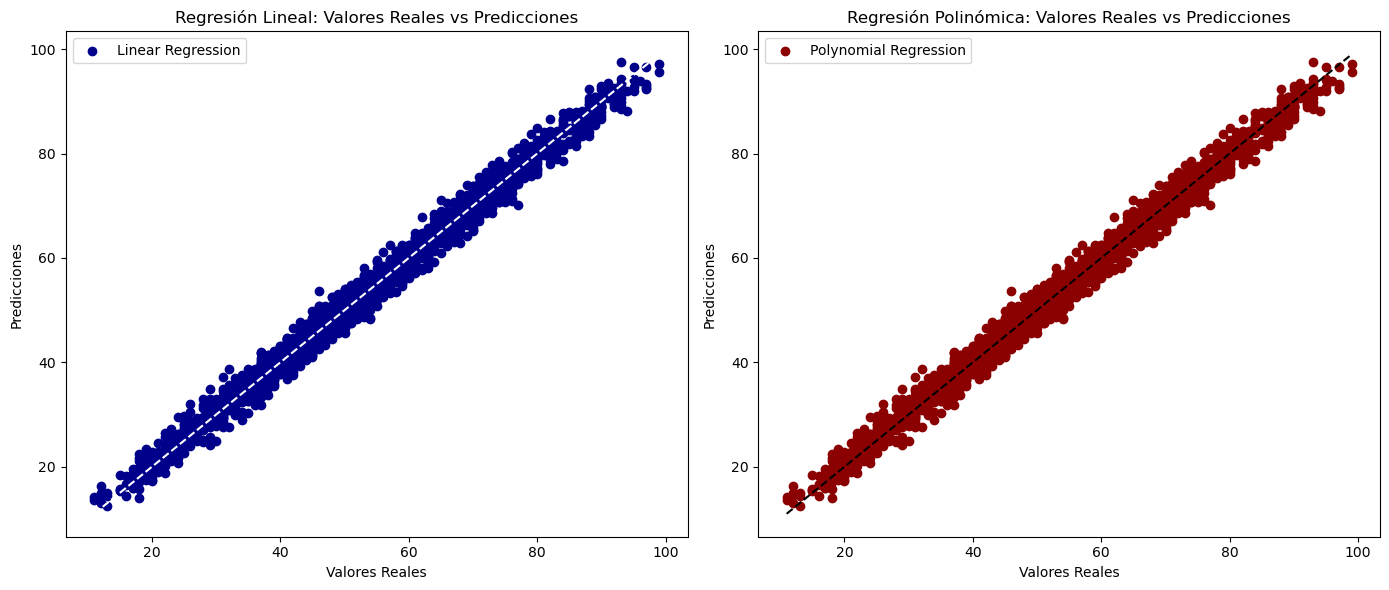

Error Cuadrático Medio (MSE) Regresión Lineal: 4.082628398521857
Error Cuadrático Medio (MSE) Regresión Polinómica: 4.082628398521857


In [19]:
# Crear una figura y establecer el tamaño
plt.figure(figsize=(14, 6))

# Gráfico de regresión lineal
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='darkblue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='white', linestyle='--')  # Línea y = x
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal: Valores Reales vs Predicciones')
plt.legend()

# Gráfico de regresión polinómica
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, color='darkred', label='Polynomial Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')  # Línea y = x
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Polinómica: Valores Reales vs Predicciones')
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()
print(f'Error Cuadrático Medio (MSE) Regresión Lineal: {mse_linear}')
print(f'Error Cuadrático Medio (MSE) Regresión Polinómica: {mse_poly}')

El hecho de que el grado 1 sea el mejor en la regresión polinómica y los resultados sean equivalentes a los de la regresión lineal demuestra que los datos <font color='darkred'>**siguen una relación lineal**</font>, lo que justifica que la regresión lineal simple es el mejor ajuste para este conjunto de datos. Por lo tanto, <font color='darkred'>**no es necesario utilizar un modelo más complejo, ya que no aportaría mejoras adicionales.**</font>